## Прогноз оттока пользователей в фитнес-центрах

### Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* выделить целевые группы клиентов;
* предложить меры по снижению оттока;
* определить другие особенности взаимодействия с клиентами.

### Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

* _gender_ — пол;
* _Near_Location_ — проживание или работа в районе, где находится фитнес-центр;
* _Partner_ — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* _Promo_friends_ — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* _Phone_ — наличие контактного телефона;
* _Age_ — возраст;
* _Lifetime_ — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* _Contract_period_ — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* _Month_to_end_contract_ — срок до окончания текущего действующего абонемента (в месяцах);
* _Group_visits_ — факт посещения групповых занятий;
* _Avg_class_frequency_total_ — средняя частота посещений в неделю за все время с начала действия абонемента;
* _Avg_class_frequency_current_month_ — средняя частота посещений в неделю за предыдущий месяц;
* _Avg_additional_charges_total_ — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* _Churn_ — факт оттока в текущем месяце.

### Задачи исследования:

* Исследовательский анализ данных (EDA)
  - Поиск отсутствующих значений (пропусков), изучение средних значений и стандартных отклонений;
  - Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
  - Построение матрицы корреляций и отображение её.
  
  
* Построение модели прогнозирования оттока клиентов
  - Построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
  - Обучение модели на train-выборке двумя способами: логистической регрессией, случайным лесом.
  - Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнение по ним модели. 
  
 
* Кластеризация клиентов
  - Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы. 
  - Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов. 
  - Средние значения признаков для кластеров.
  - Построение распределения признаков для кластеров.
  - Оценка доли оттока (методом groupby()). 
  

* Выводы и базовые рекомендации по работе с клиентами

### Исследовательский анализ данных

In [3]:
# импорт необходимых библиотек
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
import datetime
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек для работы с машинным обучением
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
# импорт файла
import os

pth1 = 'C:/Users/Admin/Downloads/gym_churn.csv'
pth2 = '/datasets/gym_churn.csv'

if os.path.exists(pth1):
    gym = pd.read_csv(pth1)
elif os.path.exists(pth2):
    gym = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
# функция для исследовательского анализа данных и перевода названий столбцов к нижнему регистру
def info(a):
    display(a.head(10)),
    a.info(),
    print('Дубликатов',a.duplicated().sum()),
    a.columns = a.columns.str.lower()
    display(a.describe())

In [6]:
info(gym)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
# перевод столбца month_to_end_contract к целочисленному типу
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(np.int64)

* В датасете 4000 строк без пропусков и дубликатов. 
* Названия столбцов привели к нижнему регистру 
* Числовые значения в столбце с месяцами привели к целочисленному типу

Посмотрим на средние значения признаков в двух группах: тех, кто ушел в отток и тех, кто остался

In [8]:
gym.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


* На отток клиентов не влияет пол
* Клиенты, перестающие посещать клуб, живут не рядом с ним
* Клиенты по партнерской программе или по акции "приведи друга" чаще остаются в клубе
* Клиенты, посещающие групповые занятия, чаще остаются в клубе
* В среднем клиенты, уходящие в отток занимаются около месяца

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

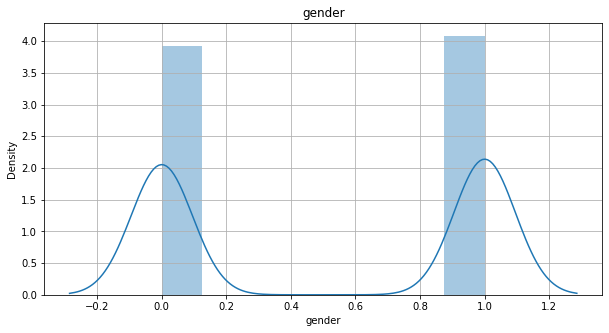

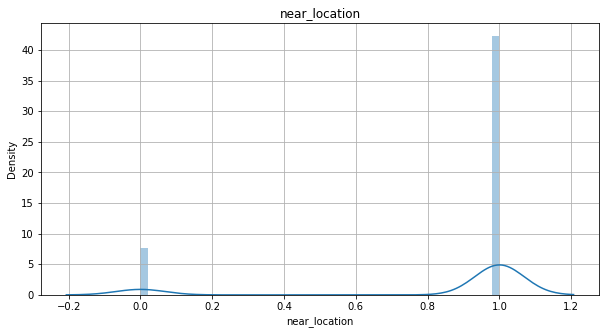

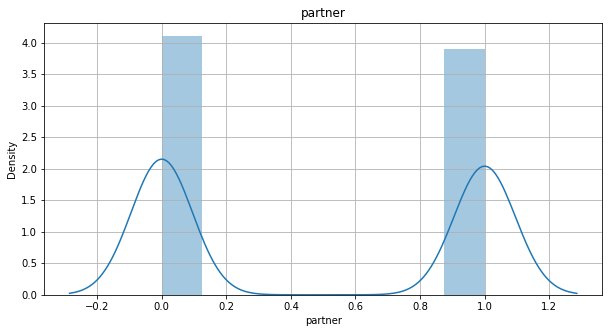

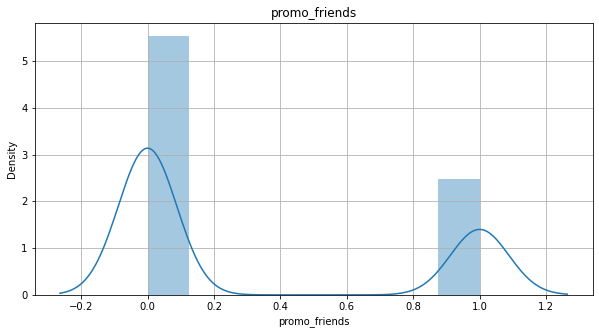

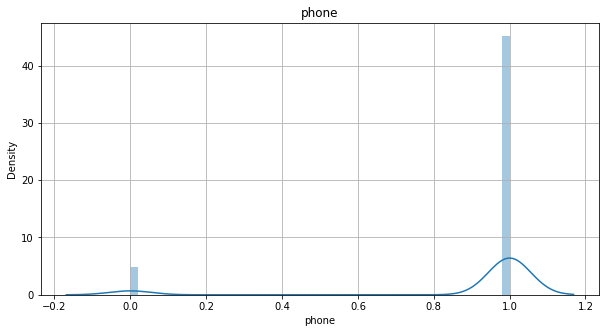

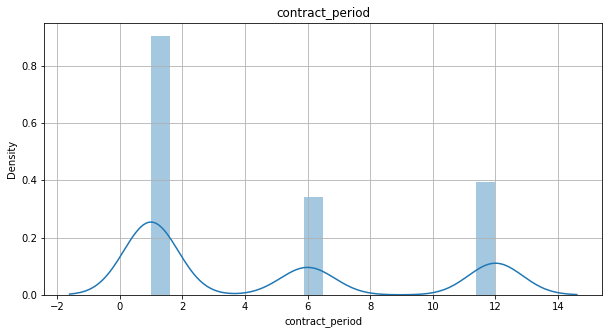

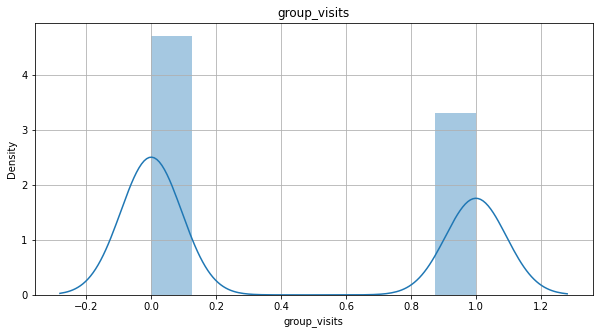

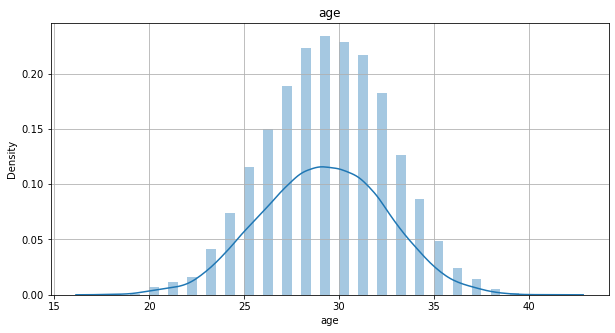

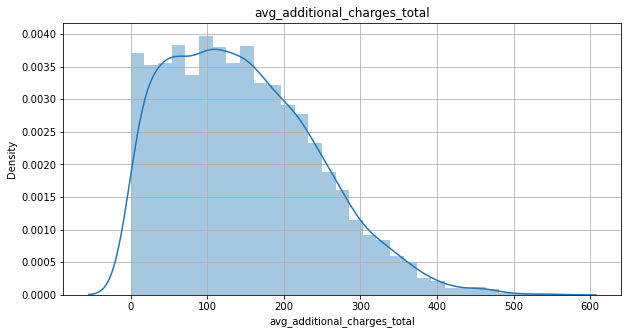

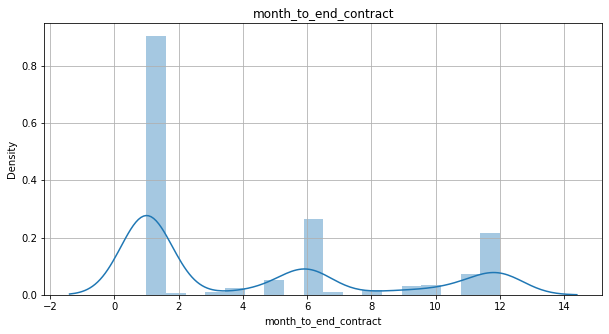

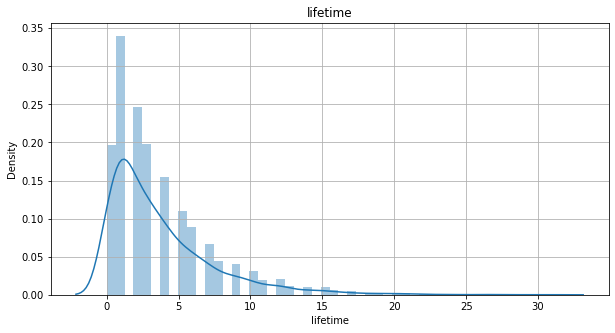

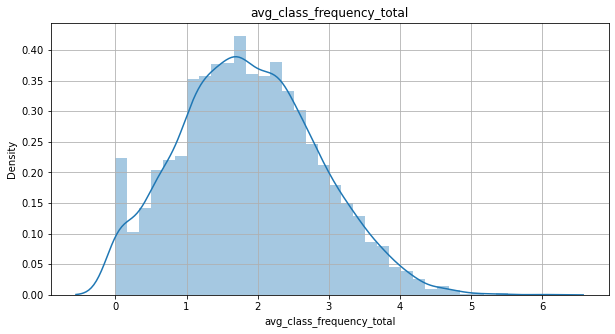

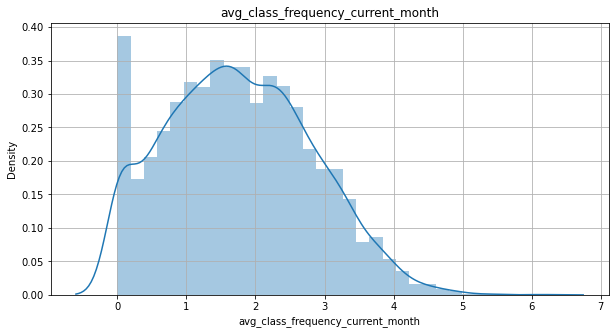

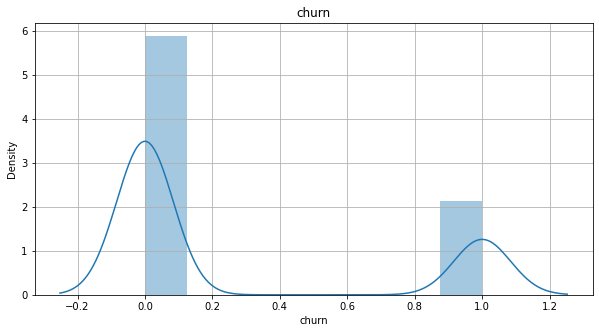

In [11]:
for column in gym.columns:
    plt.figure(figsize=(10,5))
    gym.groupby('churn')[column]
    sns.distplot(gym[column])
    plt.title(column)
    plt.grid()
    plt.show()

Отдельно построим графики для бинарных признаков

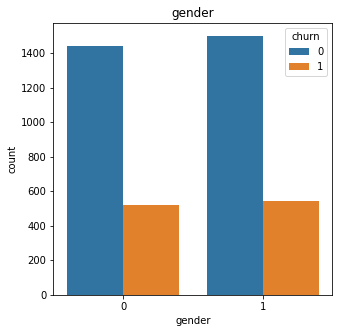

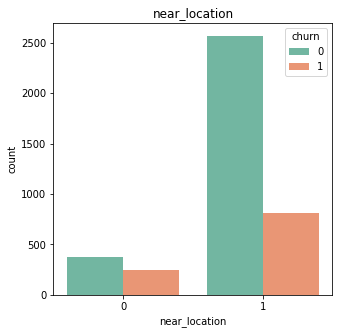

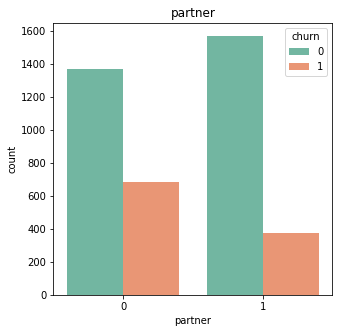

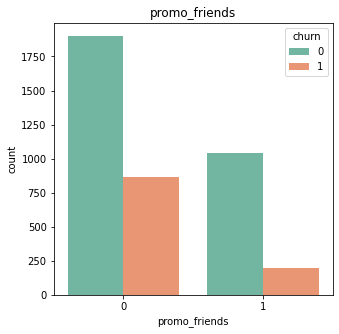

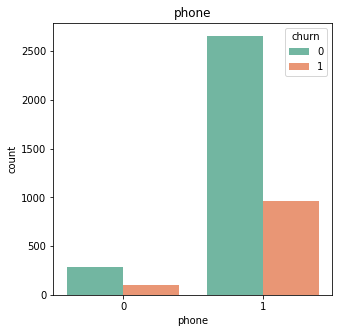

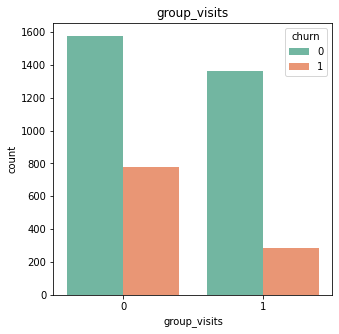

In [11]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gym[column], hue='churn', data=gym)
    sns.set_palette('Set2')
    plt.title(column)
    plt.show()

### Построение матрицы корреляций

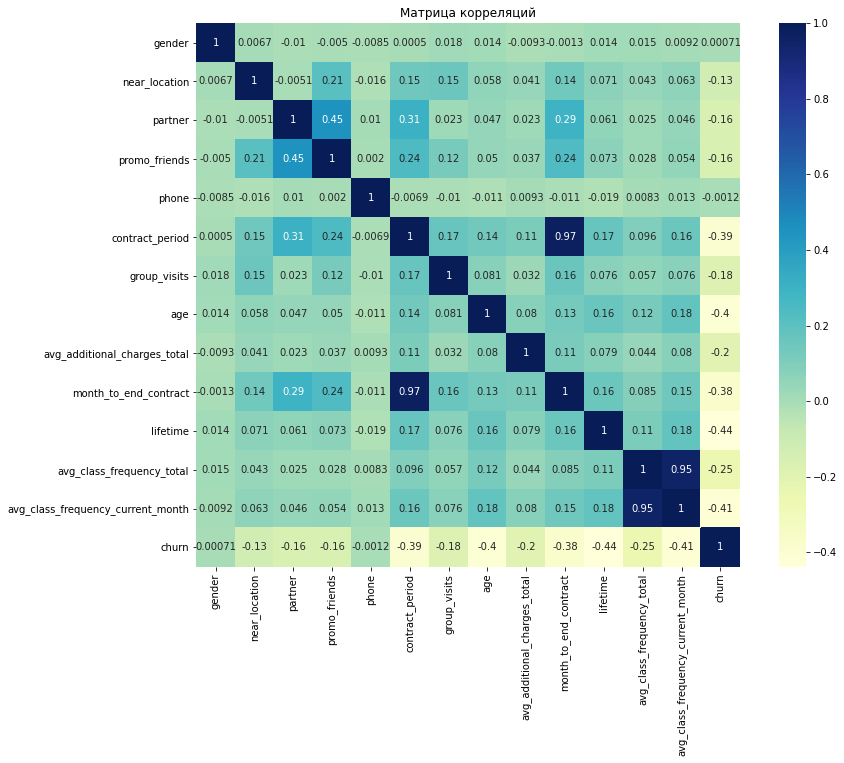

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(data = gym.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

* Признаки с нулевой корреляцией с целевой переменной (номер телефона и пол), они никак не влияют на отток.
* Мультиколлинеарные признаки - contract_period (срок до окончания текущего действующего абонемента) и month_to_end_contract (срок до окончания текущего действующего абонемента), avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц) и avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента). 
* Наиболее сильное влияние на отток: время с момента первого обращения в фитнес-центр, количество посещений в месяц, возраст, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг.
* Чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе.

### Построение модели прогнозирования оттока клиентов

### Построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

Разобъем данные на обучающую и валидационную выборки функцией train_test_split()

In [13]:
#разобивка столбцов на обучающую и валидационную выборки
X = gym.drop(['churn'], axis = 1)
y = gym['churn']

Обучим модель на train-выборке логистической регрессией и случайным лесом.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

#### Разобъем данные на обучающую и валидационную выборку

In [33]:
X = gym.drop(['churn'], axis = 1)
y = gym['churn']

#### Логистическая регрессия без стандартизации

In [34]:
#логистическая регрессия без стандартизации
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0,
                                                    stratify=y)

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [35]:
def print_info(a, b):
    print('Accuracy: {:.2f}'.format(accuracy_score(a, b)))
    print('Precision: {:.2f}'.format(precision_score(a, b)))
    print('Recall: {:.2f}'.format(recall_score(a, b)))

In [36]:
print_info(y_test, predictions)

Accuracy: 0.92
Precision: 0.88
Recall: 0.81


#### Выводы по метрикам:
* Метрика accuracy для данного датасета является не самой удачной, т.к. accuracy работает только при условии баланса классов — когда объектов каждого класса примерно поровну, 50% : 50%.
* Precision показывает, какая доля прогнозов относительно "1" класса верна. То есть оцениваются правильные ответы только среди целевого класса. В бизнесе метрика precision нужна, если каждое срабатывание модели — факт отнесения к классу "1" — стоит ресурсов.
* Метрика Recall нацелена на минимизацию противоположных рисков и показывает, сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели. Эта метрика полезна при диагностике заболеваний и являетя более подходящей для наших задач.
* В нашей задаче по определению оттока клиентов, ошибкой первого рода будет принятие лояльного клиента за уходящего, так как наша нулевая гипотеза состоит в том, что никто из клиентов не уходит, а мы эту гипотезу отвергаем. Соответственно, ошибкой второго рода будет являться "пропуск" уходящего абонента и ошибочное принятие нулевой гипотезы.
* Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.
* Определив стратегию и ресурс для удержания клиентов, можно подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или на удержании тех, кто уйдет с большей вероятностью, так как есть ограничение в ресурсах.
* С точки зрения бизнеса в данном проекте наиболее подходящей является метрика Recall относительно класса, уходящих в отток



#### Логистическая регрессия со стандартизацией

In [37]:
#логистическая регрессия со стандартизацией
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr_model.fit(X_train_st, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [38]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities =  lr_model.predict_proba(X_test_st)[:,1]

In [39]:
print_info(y_test, lr_predictions)

Accuracy: 0.92
Precision: 0.88
Recall: 0.82


#### Случайный лес

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [41]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [42]:
print_info(y_test, rf_predictions)

Accuracy: 0.91
Precision: 0.85
Recall: 0.77


Вывод:

Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии
Таким образом, модель логистической регрессии показала себя лучше, чем случайный лес.

### Кластеризация клиентов

#### Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы

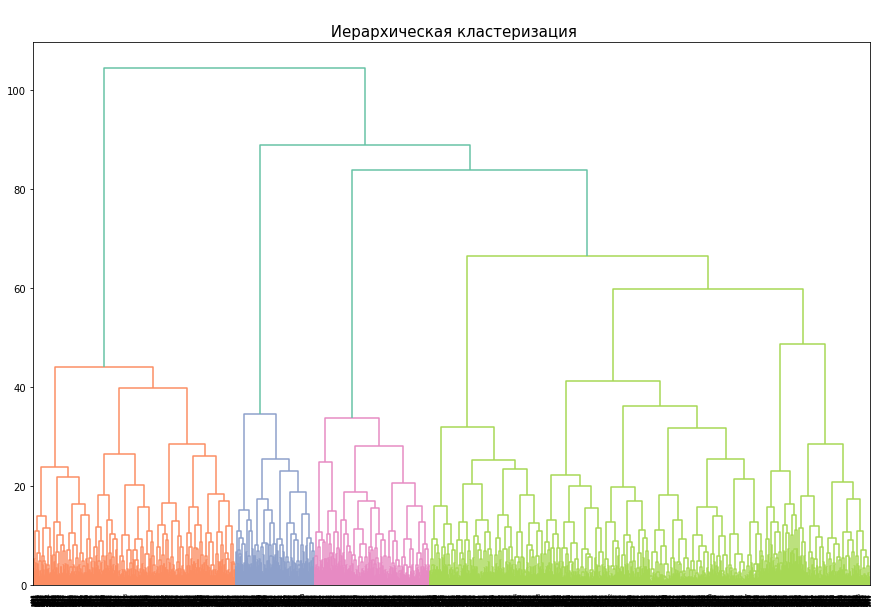

In [43]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

Можно выделить 5 кластеров.

#### Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов

In [45]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
gym['cluster_km'] = labels

In [46]:
gym.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Самый большой отток во 1 и 2 кластере - 52% и 44%, самый маленький отток в 0 кластере - 3%.
Признаки, характерные для 0 и 4 кластеров (оптимальных с точки зрения оттока):
* по половому признаку распределены примерно поровну
* в основном живут недалеко, часто приходят по партнерской акции или приглашению друзей
* почти в половине случаев посещают групповые занятия, возраст около 30 лет

#### Построим распределения признаков для кластеров

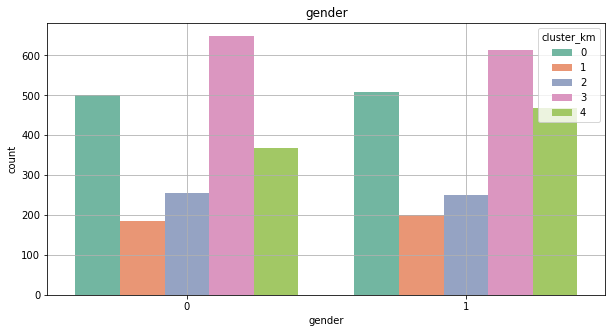

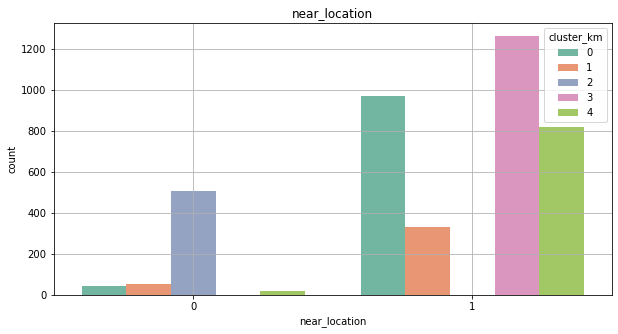

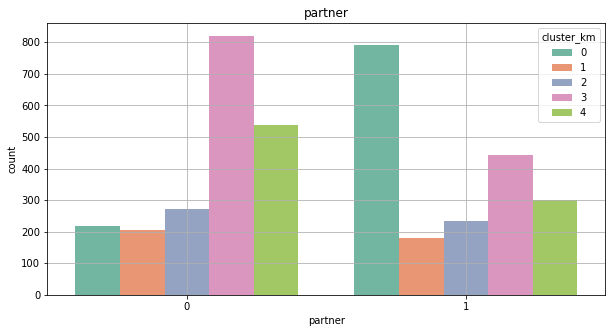

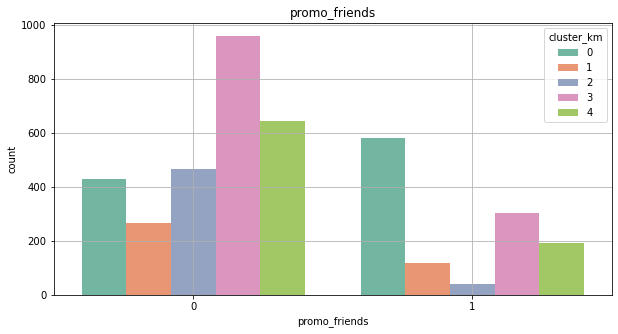

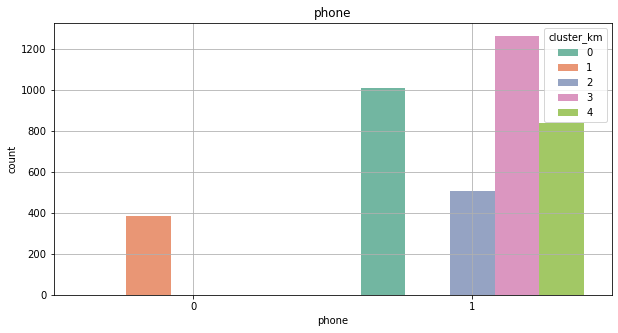

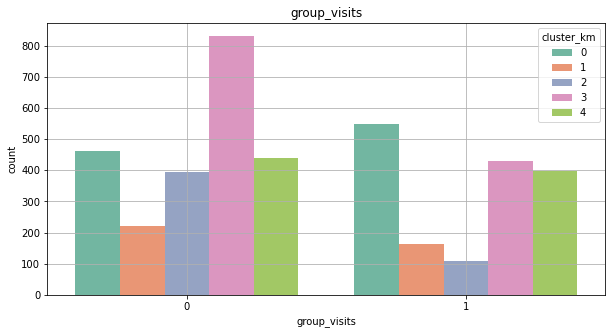

In [47]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = gym[column], hue='cluster_km', data=gym)
    plt.title(column)
    plt.grid()
    plt.show()

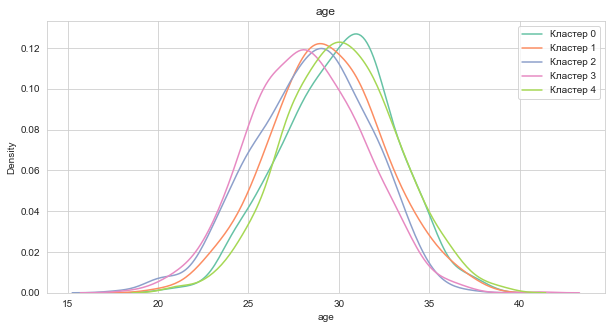

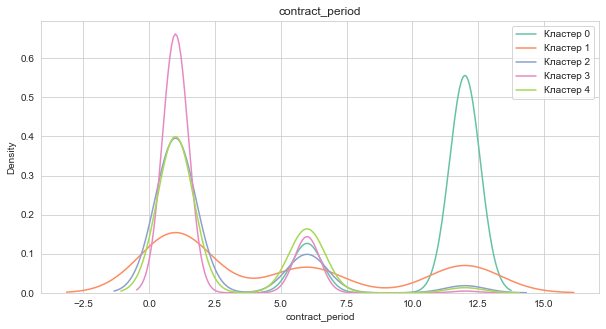

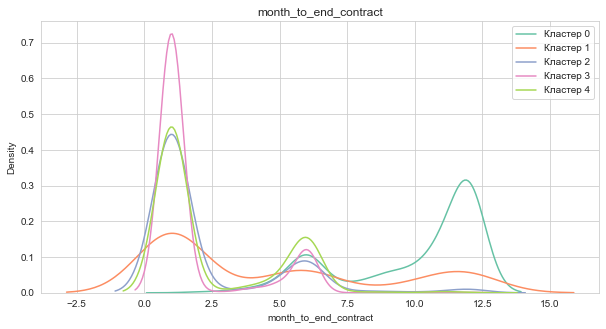

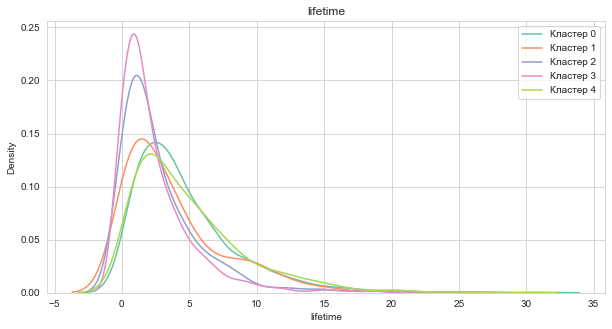

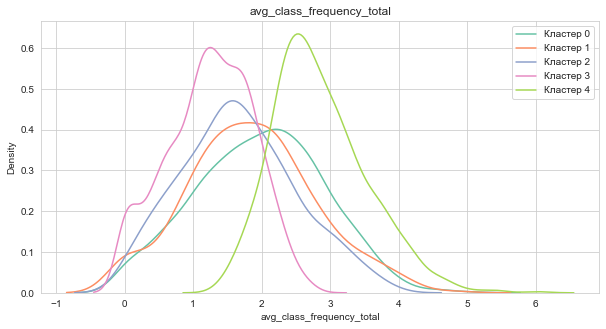

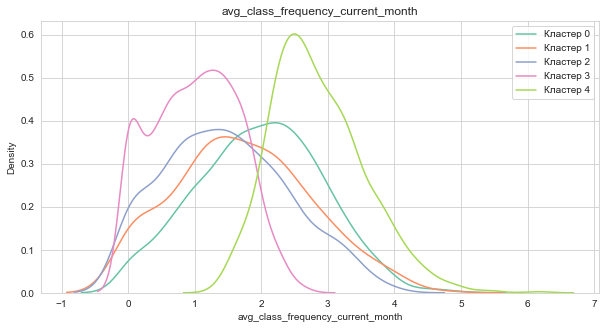

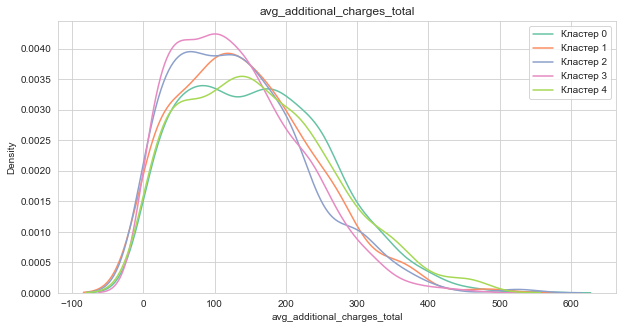

In [54]:
#построим kdeplot-графики для небинарных признаков
for column in ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(10, 5))
    plt.title(column)   
    sns.kdeplot(gym.query('cluster_km == 0')[column], label = 'Кластер 0')
    sns.kdeplot(gym.query('cluster_km == 1')[column], label = 'Кластер 1')
    sns.kdeplot(gym.query('cluster_km == 2')[column], label = 'Кластер 2')
    sns.kdeplot(gym.query('cluster_km == 3')[column], label = 'Кластер 3')
    sns.kdeplot(gym.query('cluster_km == 4')[column], label = 'Кластер 4')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

#### Оценка доли оттока (методом groupby())

In [48]:
#средние значения оттока в кластерах
gym.groupby('cluster_km').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster_km,
0,0.027723
4,0.068019
1,0.267532
2,0.443564
3,0.514263


Оценка доли оттока подтверждает что нулевой кластер имеет наименьший процент оттока, небольшой отток характерен и для 4 кластера. 

#### Выводы и базовые рекомендации по работе с клиентами

* Чаще всего в отток попадают клиенты, которые попробовали заниматься в зале, но живут не рядом с фитнес-центром, либо не посещают групповые занятия
* Клиенты, которые пришли не по партнерской программе или не по акции "приведи друга", как правило, надолго не задерживаются
* Портрет среднестатистического клиента, который не уходит в отток: ему около 30 лет, он живет неподалеку от фитнес-центра, посещает групповые занятия, есть скидки/бонусы. У него абонемент на пол года или более.
* Для удержания постоянных клиентов подходят следующие варианты: промоакции на продление абонемента, скидки на групповые занятия, помощь в составлении ерсонального расписания групповых занятий на основе предварительной анкеты предпочтений, предложение принять участие в акции "приведи друга"
* Для снижения числа клиентов, попадающих в отток, необходимо пересмотреть бонусную программу, реализовать бесплатные пробные групповые занятия. Необходимо проведение рекламной компании с приятными бонусами для клиентов, проживающих в непосредственной близости к клубу.

• Среди клиентов выявлено 5 явных кластеров. Нулевой кластер выглядит самыми усточивыми - в нем маленький отток, всего 3%. Следовательно этот кластер является самыми прибыльным.

• В качестве алгоритма прогнозирования оттока на этих данных хорошо показала себя логистическая регрессия, с большой долей вероятности она правильно предскажет возможный отток клиента, точность будет более 90%.
